<a href="https://colab.research.google.com/github/KimberlySalazarB/Proyecto_Final_Comunicacion/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto Final del Curso**



**Introducción:**<BR>
El objetivo de este proyecto es aplicar técnicas de aprendizaje automático para predecir si una persona tiene ingresos superiores a $50,000 al año o no, utilizando el conjunto de datos "Adult" disponible en el siguiente enlace: http://archive.ics.uci.edu/dataset/2/adult. Este problema se encuadra dentro del campo del aprendizaje automático y la clasificación.

**Objetivo del estudio:** <BR>
El objetivo del estudio es construir un modelo de clasificación preciso que pueda predecir si una persona tiene ingresos superiores a $50,000 o no, utilizando características demográficas y laborales del conjunto de datos "Adult".

In [ ]:
#1
!pip install catboost

# **Importación de los modulos y bibliotecas necesarios para el entrenamiento.**

In [ ]:
#2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

Se carga la base de datos desde la URL a un DataFrame, y las columnas se nombran se nombra segun la lista 'colum_naes'

In [ ]:
#3
# Descargar el conjunto de datos
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=columns, na_values=' ?')

#**Diseño del experimento:** <BR>
 Tiene 14 características, que incluyen variables categóricas y numéricas.Algunas características pueden ser discretas y continuas.<BR>
*Descripción del conjunto de datos:*
<BR>**Las características categóricas son:**<BR>
 * Clase laboral
 * Educación
 * Estado civil
 * Ocupación
 * Relación
 * Raza
 * País de origen

**Las características numéricas son:**<BR>
 * Edad
 * Ganancia de capital
 * Pérdida de capital
 * Horas por semana<BR>

**Datos discretas**<BR>
* Edad
* Las horas por semana

**Datos continuas**<BR>
* La ganancia de capital
* La pérdida de capital

In [ ]:
#4
# Descripción del conjunto de datos
print("Descripción del conjunto de datos:")
print(data.head())

Descripción del conjunto de datos:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0    

In [ ]:
#5
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Número y tipo de características**

In [ ]:
#6
# Número y tipo de características
print("Número y tipo de características:")
print(data.dtypes)

Número y tipo de características:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


**Estrategia para el manejo de datos faltantes**<BR>
En seccion se realiza el procesamiento de datos lo cual se se identifica las caracteristicas categoricas en los dato y creamos un transformador de columnas lo cual codifica estas caracteristicas.

In [ ]:
#7
# Verificar qué columnas tienen datos faltantes
fal_data = data.isnull().sum()
print(fal_data)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [ ]:
#8
# Rellenar los datos faltantes con la palabra "desconocido"
data = data.fillna("desconocido")
# Verificar qué columnas tienen datos faltantes después de la eliminación
missing_data = data.isnull().sum()
print(missing_data)

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Aqui separamos los datos en conjunto de caracterisiticas que es 'x' y mas el vector de objetivos 'y'. Luego se didvide estos conjunto de datos en entrenamiento.

In [ ]:
#9
# Separar características (X) y variable objetivo (y)
X = data.drop('income', axis=1)
y = data['income']
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Número de muestras en los conjuntos de entrenamiento y prueba**

In [ ]:
#10
# Número de muestras en los conjuntos de entrenamiento y prueba
print("Número de muestras de entrenamiento:", len(X_train))
print("Número de muestras de prueba:", len(X_test))
print("Número de muestras por clase:")
print(y_train.value_counts())

Número de muestras de entrenamiento: 26048
Número de muestras de prueba: 6513
Número de muestras por clase:
 <=50K    19778
 >50K      6270
Name: income, dtype: int64


### **Metodología**

**Selección y extracción de características**

In [ ]:
#11
### Procesamiento de datos
# Selección y extracción de características
# Columnas numéricas: aplicar escalado estándar
# Columnas categóricas: aplicar codificación one-hot //convercion a binarios
# Definir transformadores para características numéricas y categóricas
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = StandardScaler()

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [ ]:
#12
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

**Selección y justificación de la medida de calidad:**<BR>
Utilizaremos la precisión (accuaracy) como medida de calidad para evaluar los modelos, ya que esta nos proporciona precisión, exactitud, sensibilidad o F1-score.


**Algoritmos que serán empleados y estrategia para su ajuste:**<BR>
Utilizaremos Gradient Boosting y CatBoost como algoritmos de clasificación. Asimismo, la estrategia para ajustar sus hiperparámetros es la validación cruzada.

In [ ]:
#14
# Crear el pipeline de preprocesamiento y modelado con Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [ ]:
#15
# Entrenar y ajustar el modelo de Gradient Boosting
pipeline_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [ ]:
#16
# Crear el pipeline de preprocesamiento y modelado con CatBoost
pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

In [ ]:
##17
# Entrenar y ajustar el modelo de CatBoost
pipeline_catboost.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7f3bc6377bb0>)])

In [ ]:
#18
# Realizar predicciones en los conjuntos de prueba//ajuste
y_pred_gb = pipeline_gb.predict(X_test)
y_pred_catboost = pipeline_catboost.predict(X_test)

#Evaluar la precisión

In [ ]:
#19
# Evaluar la precisión y el informe de clasificación para Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

In [ ]:
#20
# Evaluar la precisión y el informe de clasificación para CatBoost
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
report_catboost = classification_report(y_test, y_pred_catboost)

# **Experimentación y resultados**

**Evaluación del rendimiento de los modelos ensayados**

In [ ]:
#21
# Mostrar resultados
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb)
print("Classification Report:\n", report_gb)

print("\nCatBoost Classifier:")
print("Accuracy:", accuracy_catboost)
print("Classification Report:\n", report_catboost)

Gradient Boosting Classifier:
Accuracy: 0.8721019499462613
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4942
        >50K       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513


CatBoost Classifier:
Accuracy: 0.8787041302011361
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4942
        >50K       0.79      0.67      0.73      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.81      0.82      6513
weighted avg       0.87      0.88      0.88      6513



**Curva de aprendizaje para Gradient Boosting**

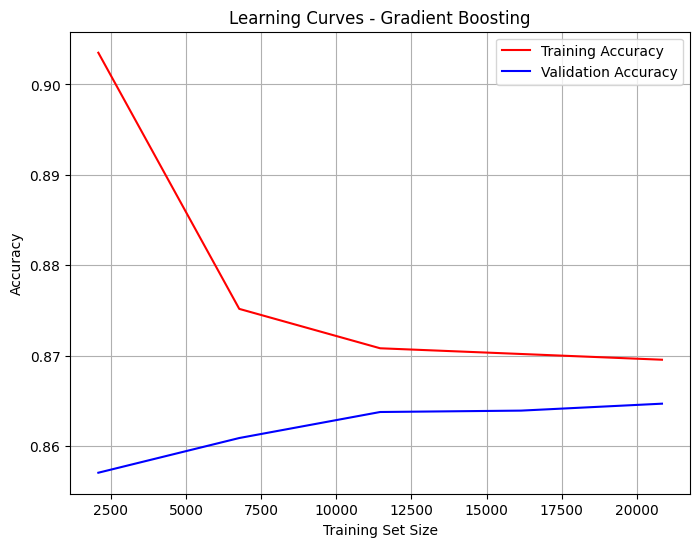

In [ ]:
#22
# Obtener las curvas de aprendizaje para Gradient Boosting
train_sizes, train_scores, test_scores = learning_curve(pipeline_gb, X_train, y_train, cv=5,scoring='accuracy', n_jobs=-1)
# Graficar las curvas de aprendizaje para Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'r-', label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), 'b-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - Gradient Boosting')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Curva de aprendizaje para para CatBoost**

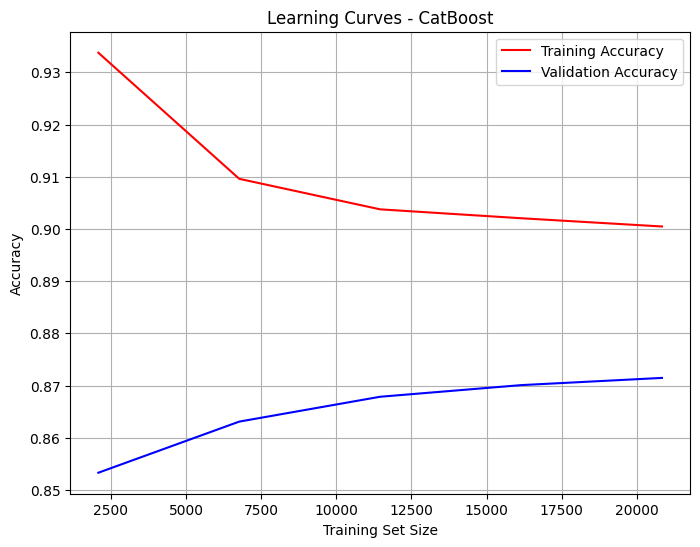

In [ ]:
#23
# Obtener las curvas de aprendizaje para CatBoost
train_sizes, train_scores, test_scores = learning_curve(pipeline_catboost, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
# Graficar las curvas de aprendizaje para CatBoost
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), 'r-', label='Training Accuracy')
plt.plot(train_sizes, test_scores.mean(axis=1), 'b-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves - CatBoost')
plt.legend(loc='best')
plt.grid(True)
plt.show()

**Comparación de línea base y resultados propios**

In [ ]:
#24
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

# Algoritmo de línea base (por ejemplo, un clasificador aleatorio)
baseline_model = DummyClassifier(strategy='most_frequent')

baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', baseline_model)
])

# Entrenar el modelo de línea base
baseline_pipeline.fit(X_train, y_train)

# Predicciones del modelo de línea base
baseline_y_pred = baseline_pipeline.predict(X_test)

# Medida de calidad del modelo de línea base
baseline_report = classification_report(y_test, baseline_y_pred, zero_division=1)
print("Línea base:")
print(baseline_report)

# Comparación de línea base y resultados propios (Gradient Boosting)
print("Comparación con Gradient Boosting:")
print("Línea base:")
print(baseline_report)
print("Gradient Boosting:")
print(report_gb)

# Comparación de línea base y resultados propios (CatBoost)
print("Comparación con CatBoost:")
print("Línea base:")
print(baseline_report)
print("CatBoost:")
print(report_catboost)

Línea base:
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4942
        >50K       1.00      0.00      0.00      1571

    accuracy                           0.76      6513
   macro avg       0.88      0.50      0.43      6513
weighted avg       0.82      0.76      0.65      6513

Comparación con Gradient Boosting:
Línea base:
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4942
        >50K       1.00      0.00      0.00      1571

    accuracy                           0.76      6513
   macro avg       0.88      0.50      0.43      6513
weighted avg       0.82      0.76      0.65      6513

Gradient Boosting:
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      4942
        >50K       0.80      0.62      0.70      1571

    accuracy                           0.87      6513
   macro avg       0.85      0.79      0.81      6

#**Ajuste de hiperparametros con GridSearchCV**


### **Grandient Boostong**

In [ ]:
# Crear el pipeline de preprocesamiento y modelado con Gradient Boosting
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Realizar la búsqueda exhaustiva de los mejores hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(pipeline_gb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model_gb = grid_search.best_estimator_

# Entrenar y ajustar el mejor modelo
best_model_gb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

###**CatBossting**

In [ ]:
# Crear el pipeline de preprocesamiento y modelado con CatBoost
pipeline_catboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=False))
])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}

# Realizar la búsqueda exhaustiva de los mejores hiperparámetros utilizando validación cruzada
grid_search_catboost = GridSearchCV(pipeline_catboost, param_grid, cv=5)
grid_search_catboost.fit(X_train, y_train)

# Obtener el mejor modelo con los mejores hiperparámetros
best_model_cat = grid_search_catboost.best_estimator_

# Entrenar y ajustar el mejor modelo
best_model_cat.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x7f3c0edec550>)])

###Evaluar la precisión

In [ ]:
# Realizar predicciones en los conjuntos de prueba//ajuste
y_pred_best_gb = best_model_gb.predict(X_test)
y_pred__best_catboost = best_model_cat.predict(X_test)

In [ ]:
# Evaluar la precisión y el informe de clasificación para Gradient Boosting
accuracy_gb1 = accuracy_score(y_test, y_pred_best_gb)
report_gb1 = classification_report(y_test, y_pred_best_gb)

In [ ]:
# Evaluar la precisión y el informe de clasificación para CatBoost
accuracy_catboost1 = accuracy_score(y_test, y_pred__best_catboost)
report_catboost1 = classification_report(y_test, y_pred__best_catboost)

**Evaluación del rendimiento de los modelos ensayados**

In [ ]:
# Mostrar resultados
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_gb1)
print("Classification Report:\n", report_gb1)

print("\nCatBoost Classifier:")
print("Accuracy:", accuracy_catboost1)
print("Classification Report:\n", report_catboost1)

Gradient Boosting Classifier:
Accuracy: 0.8762475049900199
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92      4942
        >50K       0.80      0.65      0.72      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513


CatBoost Classifier:
Accuracy: 0.8773222785198833
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      4942
        >50K       0.79      0.66      0.72      1571

    accuracy                           0.88      6513
   macro avg       0.85      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513



#**Discusión**



Los resultados obtenidos muestran la precisión de los modelos CatBoost y Boosting en la clasificación de ingresos. A partir de estos resultados, se puede concluir que ambos algoritmos son capaces de realizar predicciones con una precisión razonable en el conjunto de datos "Adult".

En cuanto a la mejora del sistema, se podrían explorar diferentes estrategias, como probar otros algoritmos de aprendizaje automático, ajustar los hiperparámetros de los modelos de forma más exhaustiva, realizar una selección más precisa de características o incluso considerar técnicas de ensamblaje de modelos para mejorar aún más el rendimiento.

Es importante tener en cuenta que estos resultados pueden variar dependiendo de la configuración específica de los algoritmos y el conjunto de datos utilizado. Por lo tanto, se recomienda realizar un análisis más detallado y ajustar el enfoque de acuerdo con los requisitos y características específicas del problema.

# **Conclusiones y trabajos futuros**
A partir de la comparación entre los modelos Gradient Boosting y CatBoost, se puede extraer varios puntos clave.

En términos de precisión, ambos modelos superaron ampliamente al modelo de línea base, que simplemente clasificó todas las instancias según la clase más frecuente. Esto demuestra que tanto Gradient Boosting como CatBoost fueron capaces de aprender patrones significativos de los datos y utilizarlos para hacer predicciones más precisas
Entre los dos, CatBoost obtuvo una precisión ligeramente mayor (0.879) en comparación con Gradient Boosting (0.872). Sin embargo, la diferencia en la precisión es bastante pequeña y podría variar dependiendo del conjunto de datos específico y la división de entrenamiento y prueba.

Al observar el informe de clasificación, vemos que ambos modelos tuvieron un rendimiento mejor en la predicción de la clase '<=50K' en comparación con la clase '>50K'. Esto se puede ver en las métricas de precisión, recall y F1-score que fueron consistentemente más altas para la clase '<=50K'.

Las curvas de aprendizaje de ambos modelos muestran que ambos modelos se beneficiaron de tener más datos de entrenamiento, ya que la precisión de validación continuó aumentando a medida que se aumentó el tamaño del conjunto de entrenamiento. Este es un buen indicador de que los modelos no estaban sobreajustados y podrían beneficiarse de tener aún más datos para entrenar.

En resumen, tanto Gradient Boosting como CatBoost demostraron ser modelos eficaces para este problema de clasificación, superando significativamente a un modelo de línea base simple. Aunque CatBoost tuvo un rendimiento ligeramente mejor en términos de precisión, la elección entre estos dos modelos podría depender de factores adicionales como la velocidad de entrenamiento, la facilidad de uso y las características específicas del problema o del conjunto de datos.

# **Referencia**

Gradient Boosting regression. (n.d.). Scikit-Learn. Retrieved June 24, 2023, from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

